# Load Library

In [27]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Load Data

karena data yang di download `flag.data` maka saya mengubah ektensinya secara manual menjadi `flag.csv` agar mudah dibaca oleh python

In [28]:
colnames = ["name", "landmass", "zone", "area", "population",
           "language", "religion", "bars", "stripes", "colours",
           "red", "green", "blue", "gold", "white", "black",
           "orange", "mainhue", "circles", "crosses", "saltires",
           "quarters", "sunstars", "crescent", "triangle", "icon",
           "animate", "text", "topleft", "botright"]

df = pd.read_csv("flag.csv", sep=",", header=None, names=colnames, error_bad_lines=False)
df.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,5,1
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,0,0
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,1,4
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,2,0
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,2,0


# Membuat Model

In [44]:
y = df["language"]
X = df.iloc[:, 7:27]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, train_size=0.8)
print("Jumlah Training Data : ", len(X_train), " | Jumlah Test Data : ", len(X_test))

Jumlah Training Data :  155  | Jumlah Test Data :  39


C:\Users\Caca\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [46]:
clf_entropy = DecisionTreeClassifier()
clf_entropy.fit(X_train, y_train)
clf_entropy.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

# Membuat Grafik

In [47]:
from sklearn.tree import export_graphviz
import graphviz 

dot_data = export_graphviz(clf_entropy, out_file=None, 
                     feature_names=data.feature_names,  
                     class_names=data.target_names,  
                     filled=True, rounded=True,
                     special_characters=True)

graph = graphviz.Source(dot_data)  
graph

ModuleNotFoundError: No module named 'graphviz'

# Corelation Matrix

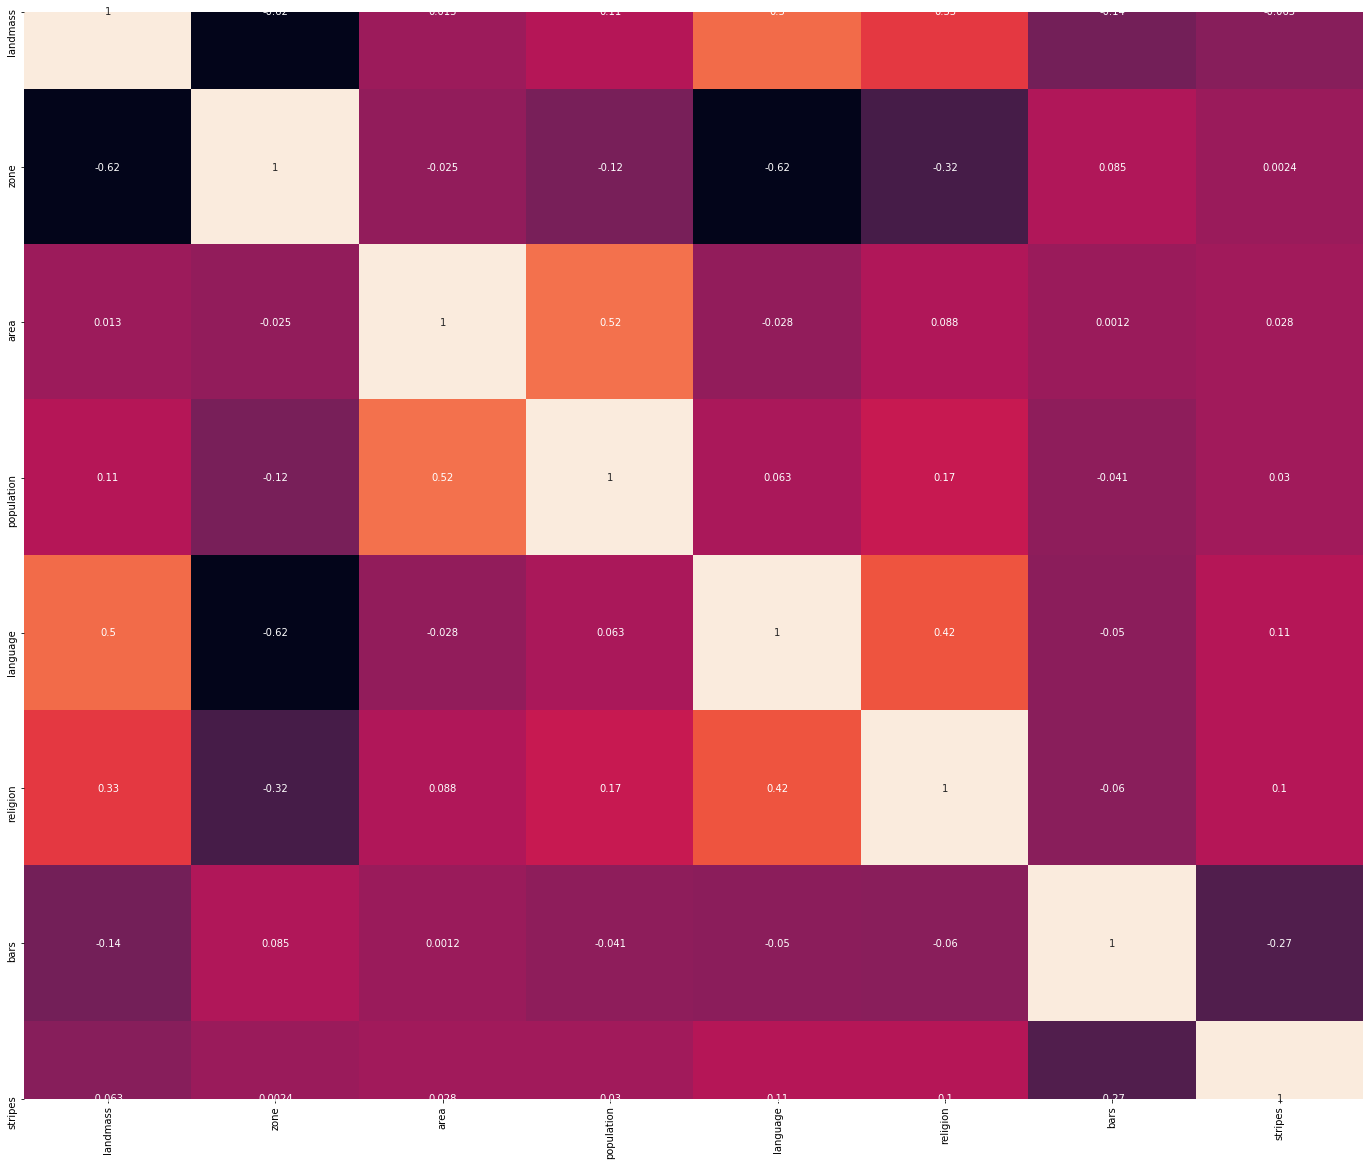

In [50]:
corr1 = df.iloc[:,].corr()
plt.figure(figsize = (24,20))
ax = sns.heatmap(corr1, annot = True, cbar=False)
plt.xticks(rotation = 90);

# Akurasi, Presisi, Sensitivity, F-1 Score

In [48]:
from sklearn.metrics import classification_report

y_pred = clf_entropy.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.46      0.63        13
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         3
           6       0.17      0.20      0.18         5
           7       0.00      0.00      0.00         1
           8       0.20      0.33      0.25         3
           9       0.00      0.00      0.00         1
          10       0.40      0.40      0.40        10

   micro avg       0.31      0.31      0.31        39
   macro avg       0.18      0.14      0.15        39
weighted avg       0.47      0.31      0.36        39



C:\Users\Caca\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Caca\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Caca\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Caca\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Caca\Anaconda3\lib\site-pac